<a href="https://colab.research.google.com/github/waltertaya/MachineLearningTutorial/blob/main/Perceptron_sigmoid_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/data.csv', header=None)
np.random.seed(42)
X = np.array(df.iloc[:, 0:2])
y = np.array(df.iloc[:, 2])

In [11]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [12]:
def prediction(X, W, b):
  return sigmoid((np.matmul(X, W) + b)[0])

In [13]:
# Perceptron step function, now using sigmoid-based predictions
def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        # Threshold at 0.5 for classification
        if y[i] - y_hat >= 0.5:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] - y_hat <= -0.5:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b

In [14]:
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.random.rand(2, 1)
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0] / W[1], -b / W[1]))
    return boundary_lines

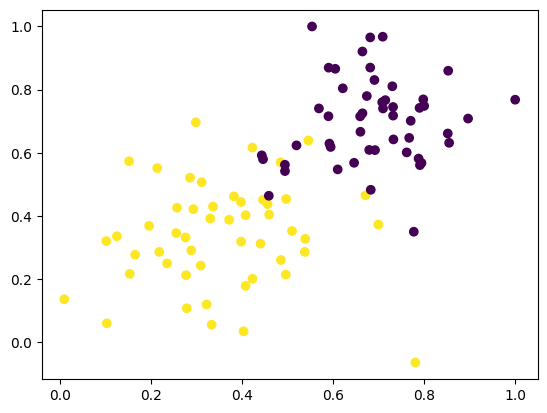

In [15]:
# Train the perceptron
boundary_lines = trainPerceptronAlgorithm(X, y)

# Plotting the scatter graph
plt.scatter(X[:, 0], X[:, 1], c=y)


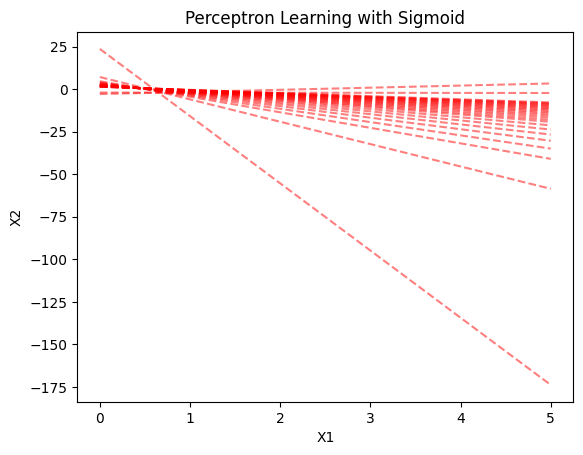

In [16]:
# Plotting the decision boundary lines
for m, c in boundary_lines:
    plt.plot([0, 5], [c, m * 5 + c], 'r--', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning with Sigmoid')
plt.show()
